# Load data from PostGIS

Loading data from GDSL PostGIS database.

## Establish connection

Using docker environment variables. Start docker as `docker run -it -e DB_PORT=<port> -e DB_USER=<username> -e DB_PWD=<password> -e DB_HOST=<host> darribas/gds_dev:5.0`.

In [6]:
import os

import geopandas as gpd

from sqlalchemy import create_engine

user = os.environ.get('DB_USER')
pwd = os.environ.get('DB_PWD')
host = os.environ.get('DB_HOST')
port = os.environ.get('DB_PORT')

In [7]:
db_connection_url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/built_env"
engine = create_engine(db_connection_url)
engine.begin()

## Select subset of data as a buffer around a set point

In [8]:
x, y = 334289.32, 390468.43  # coordinates in epsg 27700
buffer = 1500  # radius in [m]

OpenRoads from `openroads_200803` table.

In [9]:
sql = f'SELECT * FROM openroads_200803 WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'

df = gpd.read_postgis(sql, engine, geom_col='geometry')

<AxesSubplot:>

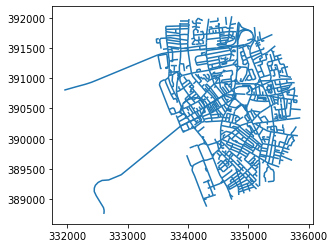

In [10]:
df.plot()

Building layer of OpenMap - Local from `openmap_buildings_200814` table.

<AxesSubplot:>

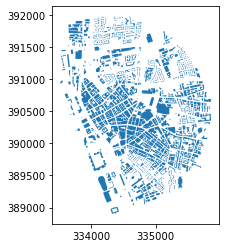

In [12]:
sql = f'SELECT * FROM openmap_buildings_200814 WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'

df = gpd.read_postgis(sql, engine, geom_col='geometry')
df.plot()